Number of object: 11


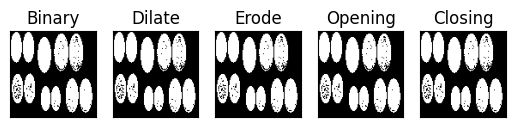

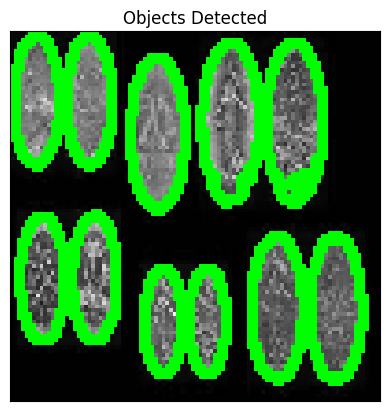

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
image = cv2.imread("/content/drive/My Drive/coin.jpg")
image = cv2.resize(image, (100, 100))

# 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Otsu의 이진화 적용
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# 모폴로지 커널 정의
kernel = np.ones((1,1), np.uint8)

# 팽창 연산 적용
dilate = cv2.dilate(binary, kernel, iterations=1)

# 침식 연산 적용
erode = cv2.erode(binary, kernel, iterations=1)

# 열림 연산 적용
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# 닫힘 연산 적용
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# 윤곽선 찾기 (dilate 이미지에서)
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 객체 수 출력
print(f'Number of object: {len(contours)}')

# 결과 이미지 준비
results = [binary, dilate, erode, opening, closing]
titles = ['Binary', 'Dilate', 'Erode', 'Opening', 'Closing']

# matplotlib를 사용해 결과 표시
for i in range(len(results)):
    plt.subplot(1, 5, i+1), plt.imshow(results[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# 객체가 그려진 원본 이미지 표시
for cnt in contours:
    cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)

# BGR 이미지를 RGB로 변환 후 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Objects Detected')
plt.xticks([]), plt.yticks([])
plt.show()
